  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:
import os
import json
import pandas as pd

In [35]:
# Path to the JSONL file
file_path = os.path.join("datasets", "cnndm", "model_annotations.aligned.jsonl")

# Read and parse the JSONL file
with open(file_path, "r", encoding="utf-8") as file:
    data = [json.loads(line) for line in file]

# create pandas dataframe
df = pd.DataFrame(data)
df.head()

,id,decoded,expert_annotations,turker_annotations,references,model_id,filepath
0,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson was brought on with only seven min...,"[{'coherence': 2, 'consistency': 1, 'fluency':...","[{'coherence': 3, 'consistency': 3, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M11,cnndm/dailymail/stories/8764fb95bfad8ee8492748...
1,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 3, 'consistency': 5, 'fluency':...","[{'coherence': 2, 'consistency': 3, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M13,cnndm/dailymail/stories/8764fb95bfad8ee8492748...
2,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 2, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 5, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M1,cnndm/dailymail/stories/8764fb95bfad8ee8492748...
3,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 2, 'consistency': 5, 'fluency':...","[{'coherence': 5, 'consistency': 5, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M14,cnndm/dailymail/stories/8764fb95bfad8ee8492748...
4,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 4, 'consistency': 5, 'fluency':...","[{'coherence': 2, 'consistency': 4, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M15,cnndm/dailymail/stories/8764fb95bfad8ee8492748...


In [36]:
# Filter the dataframe to only include the annotations for model M1
model1_df = df[df["model_id"] == "M2"]

model1_df = model1_df[["id", "model_id", "decoded", "expert_annotations", "turker_annotations", "filepath"]]
model1_df.head()

,id,model_id,decoded,expert_annotations,turker_annotations,filepath
10,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M2,paul merson has restarted his row with andros ...,"[{'coherence': 3, 'consistency': 5, 'fluency':...","[{'coherence': 2, 'consistency': 2, 'fluency':...",cnndm/dailymail/stories/8764fb95bfad8ee8492748...
26,dm-test-f26d8400ae49b90d109c165d0f44b8f6ca253c08,M2,chelsea have made an offer for fc tokyo 's 22-...,"[{'coherence': 4, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 3, 'fluency':...",cnndm/dailymail/stories/f26d8400ae49b90d109c16...
42,dm-test-207df192edc1836250b69d1bc5b9e6a38206eb78,M2,babies given antibiotics in the first six mont...,"[{'coherence': 4, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 4, 'fluency':...",cnndm/dailymail/stories/207df192edc1836250b69d...
58,dm-test-0f0789390d67698283cc87b2e046b5c5cd77edb7,M2,the queen 's guard was left red-faced after he...,"[{'coherence': 3, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 3, 'fluency':...",cnndm/dailymail/stories/0f0789390d67698283cc87...
74,cnn-test-fbbafa743a8c2ecd2cedf65c6c61956b2db8ec5c,M2,"`` roots , '' the epic miniseries about an afr...","[{'coherence': 5, 'consistency': 5, 'fluency':...","[{'coherence': 5, 'consistency': 5, 'fluency':...",cnndm/cnn/stories/fbbafa743a8c2ecd2cedf65c6c61...


In [37]:
expert_annotations = model1_df["expert_annotations"]
turker_annotations = model1_df["turker_annotations"]

# for each row in the expert_annotations column, get the array of annotations and extract coherence score
expert_coherence_scores = expert_annotations.apply(lambda x: [annotation["coherence"] for annotation in x])

# for each row in the turker_annotations column, get the array of annotations and extract coherence score
turker_coherence_scores = turker_annotations.apply(lambda x: [annotation["coherence"] for annotation in x])

# get the average coherence score for each row
expert_coherence_scores = expert_coherence_scores.apply(lambda x: sum(x) / len(x))
turker_coherence_scores = turker_coherence_scores.apply(lambda x: sum(x) / len(x))

expert_coherence_scores, turker_coherence_scores



(10      2.666667
 26      3.666667
 42      3.333333
 58      2.666667
 74      4.666667
           ...   
 1530    4.333333
 1546    4.000000
 1562    3.333333
 1578    3.000000
 1594    4.000000
 Name: expert_annotations, Length: 100, dtype: float64,
 10      2.0
 26      4.0
 42      4.0
 58      4.2
 74      4.6
        ... 
 1530    3.0
 1546    4.0
 1562    4.0
 1578    3.0
 1594    3.0
 Name: turker_annotations, Length: 100, dtype: float64)

In [38]:
model1_df["expert_coherence_score"] = expert_coherence_scores
model1_df["turker_coherence_score"] = turker_coherence_scores

model1_df = model1_df[["id", "model_id", "decoded", "expert_coherence_score", "turker_coherence_score", "filepath"]]
model1_df.head()

,id,model_id,decoded,expert_coherence_score,turker_coherence_score,filepath
10,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M2,paul merson has restarted his row with andros ...,2.666667,2.0,cnndm/dailymail/stories/8764fb95bfad8ee8492748...
26,dm-test-f26d8400ae49b90d109c165d0f44b8f6ca253c08,M2,chelsea have made an offer for fc tokyo 's 22-...,3.666667,4.0,cnndm/dailymail/stories/f26d8400ae49b90d109c16...
42,dm-test-207df192edc1836250b69d1bc5b9e6a38206eb78,M2,babies given antibiotics in the first six mont...,3.333333,4.0,cnndm/dailymail/stories/207df192edc1836250b69d...
58,dm-test-0f0789390d67698283cc87b2e046b5c5cd77edb7,M2,the queen 's guard was left red-faced after he...,2.666667,4.2,cnndm/dailymail/stories/0f0789390d67698283cc87...
74,cnn-test-fbbafa743a8c2ecd2cedf65c6c61956b2db8ec5c,M2,"`` roots , '' the epic miniseries about an afr...",4.666667,4.6,cnndm/cnn/stories/fbbafa743a8c2ecd2cedf65c6c61...


In [41]:
# get the number of rows in the dataframe
num_rows = model1_df.shape[0]
num_rows

100

In [33]:
import ollama

In [44]:
model_name = "evallm:v1"

query_template = (
    "What is the evaluation of the summary of this given text?\nText:\n {text} \n\nSummary:\n {summary} Score: \n"
)


In [50]:
ollama_responses = []

for i in range(num_rows):
    text_file = os.path.join("datasets", model1_df.iloc[i]["filepath"])
    summary = model1_df.iloc[i]["decoded"]
    with open(text_file, "r", encoding="utf-8") as file:
        text = file.read()
    query = query_template.format(text=text, summary=summary)

    print(f"Query {i+1}: running")
    ollama_response = ollama.chat( 
        model=model_name,
        messages=[
            {"role": "user", "content": query},
        ],
    )
    print(f"Query {i+1}: completed")
    
    ollama_responses.append(ollama_response.message.content)


Query 1: running
Query 1: completed
Query 2: running
Query 2: completed
Query 3: running
Query 3: completed
Query 4: running
Query 4: completed
Query 5: running
Query 5: completed
Query 6: running
Query 6: completed
Query 7: running
Query 7: completed
Query 8: running
Query 8: completed
Query 9: running
Query 9: completed
Query 10: running
Query 10: completed
Query 11: running
Query 11: completed
Query 12: running
Query 12: completed
Query 13: running
Query 13: completed
Query 14: running
Query 14: completed
Query 15: running
Query 15: completed
Query 16: running
Query 16: completed
Query 17: running
Query 17: completed
Query 18: running
Query 18: completed
Query 19: running
Query 19: completed
Query 20: running
Query 20: completed
Query 21: running
Query 21: completed
Query 22: running
Query 22: completed
Query 23: running
Query 23: completed
Query 24: running
Query 24: completed
Query 25: running
Query 25: completed
Query 26: running
Query 26: completed
Query 27: running
Query 27: co

In [51]:
ollama_responses

["4\n\nThe summary effectively conveys the main topic of Merson's renewed criticism of Townsend, and accurately reports the key points of their ongoing feud. The sentences are clear and logically ordered, making it easy to follow the narrative. However, it is a relatively straightforward summary that doesn't add much new insight or depth to the original article.",
 "5 \n\nThe summary covers the main topic and key points of the news article, presenting them in a clear and logical order. It accurately conveys Chelsea's interest in Muto, his potential loan to Vitesse Arnhem, and Ogane's comments on the bid. The summary is concise and well-structured, making it easy to understand the information presented.",
 "4\n\nThe summary covers the main topic and key points of the news article, including the findings of the study and the potential link between antibiotic use and childhood obesity. The sentences are clear and logically ordered, presenting a coherent body of information about the topic

In [56]:
ollama_scores = map(lambda x: int(x.split()[0]), ollama_responses)

ollama_scores = list(ollama_scores)
ollama_scores

[4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [57]:
my_scores = pd.Series(ollama_scores)
my_scores.head()

0    4
1    5
2    4
3    4
4    4
dtype: int64

In [58]:
model1_df.reset_index(drop=True, inplace=True)
model1_df["ollama_score"] = my_scores
model1_df.head()

,id,model_id,decoded,expert_coherence_score,turker_coherence_score,filepath,ollama_score
0,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M2,paul merson has restarted his row with andros ...,2.666667,2.0,cnndm/dailymail/stories/8764fb95bfad8ee8492748...,4
1,dm-test-f26d8400ae49b90d109c165d0f44b8f6ca253c08,M2,chelsea have made an offer for fc tokyo 's 22-...,3.666667,4.0,cnndm/dailymail/stories/f26d8400ae49b90d109c16...,5
2,dm-test-207df192edc1836250b69d1bc5b9e6a38206eb78,M2,babies given antibiotics in the first six mont...,3.333333,4.0,cnndm/dailymail/stories/207df192edc1836250b69d...,4
3,dm-test-0f0789390d67698283cc87b2e046b5c5cd77edb7,M2,the queen 's guard was left red-faced after he...,2.666667,4.2,cnndm/dailymail/stories/0f0789390d67698283cc87...,4
4,cnn-test-fbbafa743a8c2ecd2cedf65c6c61956b2db8ec5c,M2,"`` roots , '' the epic miniseries about an afr...",4.666667,4.6,cnndm/cnn/stories/fbbafa743a8c2ecd2cedf65c6c61...,4


In [59]:
model1_df['ollama_expert_diff'] = model1_df['ollama_score'] - model1_df['expert_coherence_score']
model1_df['ollama_turker_diff'] = model1_df['ollama_score'] - model1_df['turker_coherence_score']
model1_df.head()

,id,model_id,decoded,expert_coherence_score,turker_coherence_score,filepath,ollama_score,ollama_expert_diff,ollama_turker_diff
0,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,M2,paul merson has restarted his row with andros ...,2.666667,2.0,cnndm/dailymail/stories/8764fb95bfad8ee8492748...,4,1.333333,2.0
1,dm-test-f26d8400ae49b90d109c165d0f44b8f6ca253c08,M2,chelsea have made an offer for fc tokyo 's 22-...,3.666667,4.0,cnndm/dailymail/stories/f26d8400ae49b90d109c16...,5,1.333333,1.0
2,dm-test-207df192edc1836250b69d1bc5b9e6a38206eb78,M2,babies given antibiotics in the first six mont...,3.333333,4.0,cnndm/dailymail/stories/207df192edc1836250b69d...,4,0.666667,0.0
3,dm-test-0f0789390d67698283cc87b2e046b5c5cd77edb7,M2,the queen 's guard was left red-faced after he...,2.666667,4.2,cnndm/dailymail/stories/0f0789390d67698283cc87...,4,1.333333,-0.2
4,cnn-test-fbbafa743a8c2ecd2cedf65c6c61956b2db8ec5c,M2,"`` roots , '' the epic miniseries about an afr...",4.666667,4.6,cnndm/cnn/stories/fbbafa743a8c2ecd2cedf65c6c61...,4,-0.666667,-0.6


In [62]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Ollama vs Expert Coherence Score Difference'}, ylabel='Frequency'>

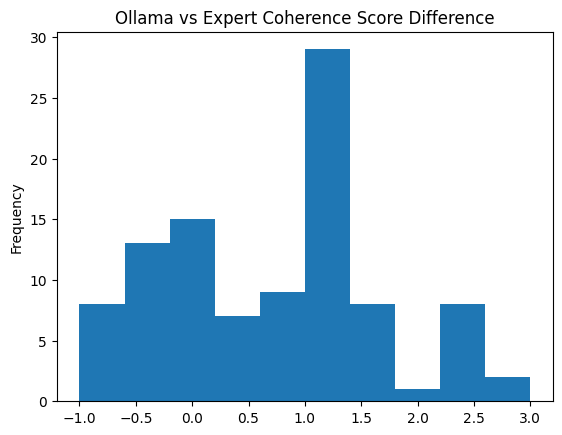

In [ ]:
model1_df.ollama_expert_diff.plot(kind='hist', title='Ollama vs Expert Coherence Score Difference')

<Axes: title={'center': 'Ollama vs Turker Coherence Score Difference'}, ylabel='Frequency'>

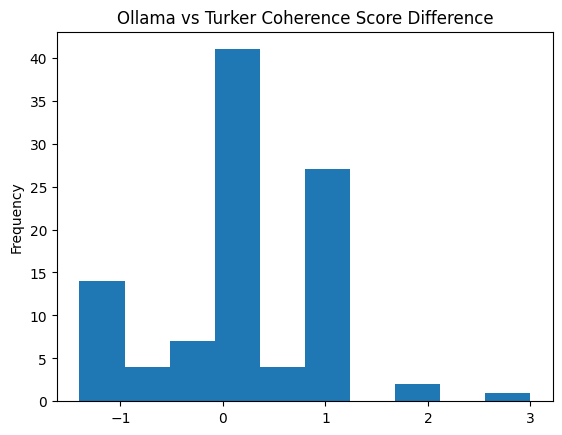

In [64]:
model1_df.ollama_turker_diff.plot(kind='hist', title='Ollama vs Turker Coherence Score Difference')